<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: Dungeons & Dragons</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/dungeons-and-dragons/">https://discovery.cs.illinois.edu/microproject/dungeons-and-dragons/</a></div>
</h1>

<hr style="color: #DD3403;">

## Introduction

[Dungeons & Dragons](https://dnd.wizards.com/) is a tabletop role-playing game in which you and your friends play a group of adventurers and seek to slay monsters, meet NPCs, and become more powerful in a fantasy world. One of the most recognizable aspects is the [dice](https://upload.wikimedia.org/wikipedia/commons/9/98/Dungeons_%26_Dragons_Dice.jpg) used to determine the outcome of events. The dice are designated by "d" followed by the number of sides. For example, a d6 is a standard 6-sided die. There's also a d4, d8, d10, d12, d20, and d% (the same shape as a d10 but with 00, 10, 20, etc). Fun fact: most of the dice are [platonic solids](https://en.wikipedia.org/wiki/Platonic_solid)!

In this MicroProject, you will create simulations of dice rolls and explore the statistics of the rolls.  Let's nerd out!

<hr style="color: #DD3403;">

## Puzzle 1: Creating the Dice

### Puzzle 1.1: `rollDie` Function

If we're going to roll dice, we'll need to create the dice first! We could create a function for every die, but that seems redundant. Let's instead create a more general function `rollDie` that takes a parameter `sides` representing how many sides the die has. The die is fair, so each side is equally likely!

In [1]:
import pandas as pd 
import random

In [17]:
def rollDie (sides):
    return random.randint(1, sides)

You may be wondering what we can do about the d%. Luckily, the d% is almost always rolled along with the d10. If you add them, the d% provides the tens digit, and the d10 provides the ones digit. This is essentially the same as rolling a 100-sided die, so we can just use `sides = 100`!

In [18]:
### TEST CASE for Puzzle 1.1: rollDie function

tada = "\N{PARTY POPPER}"

assert("rollDie" in vars()), "Make sure to name the function rollDie"
assert(all([all([i in [rollDie(sides) for _ in range(1000)] for i in range(1,sides+1)]) for sides in [4,6,8,10,12,20,100]])), "rollDie should be able to roll all values between 1 and sides, inclusive"
assert(all([all([i in range(1,sides+1) for i in [rollDie(sides) for _ in range(1000)]]) for sides in [4,6,8,10,12,20,100]])), "rollDie should only roll values between 1 and sides, inclusive"
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Puzzle 1.2: Rolling Dice

Awesome, we can now roll a die with any number of sides! Let's test it out. Set `num_sides` equal to your favorite number out of **4, 6, 8, 10, 12, 20, and 100**, then run a simulation rolling a die with `num_sides` sides **10,000** times! Store the results in `df` under the column `"roll"`.

In [58]:
num_sides = 20
data = []
for i in range(10000):
    num = rollDie(num_sides)
    d = {"roll": num}
    data.append(d)

df = pd.DataFrame(data)
df

,roll
0,11
1,2
2,11
3,9
4,18
...,...
9995,7
9996,18
9997,18
9998,2


In [59]:
### TEST CASE for Puzzle 1.2: Testing the die

tada = "\N{PARTY POPPER}"

assert("num_sides" in vars()), "Make sure to define num_sides"
assert(num_sides in [4,6,8,10,12,20,100]), "Set num_sides to one of 4, 6, 8, 10, 12, 20, 100"
assert("df" in vars()), "Make sure to name the dataframe df_test_rolls"
assert(len(df) == 10000), "Make sure to roll 10,000 times"
assert(all(df.roll.isin(range(1, num_sides+1)))), f"Found rolls that were not between 1 and {num_sides}, inclusive"
assert(all([i in df.roll.values for i in range(1, num_sides+1)])), f"Not all values between 1 and {num_sides}, inclusive, were rolled"
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


## Puzzle 1.3: Visualizing the Result

It may feel natural to create a histogram since the result of dice rolls feels like continuous data being in the range `[1, 2, 3, 4, ...]`.  However, each roll is a **single discrete result in one of a finite set of categories**.

Since the dice rolls are finite set of categories, the best simple data visualization to use is a **bar chart** (not a histogram).  To create a bar chart, we need to count the number of times each value appears in our DataFrame.

Read the DISCOVERY guide "Creating a Frequency Bar Chart from a DataFrame" to find out more about frequency bar charts:

- [Guide: "Creating a Frequency Bar Chart from a DataFrame"](https://discovery.cs.illinois.edu/guides/Data-Visualization/value-counts-bar-chart/)

Create a visualization of your original `df` as an ordered bar chart of the outcomes of your dice rolls. **Make certain that your x-axis is sorted by the category/index value (not the frequency)**.

<Axes: title={'center': '# of rolls for each side'}, xlabel='roll'>

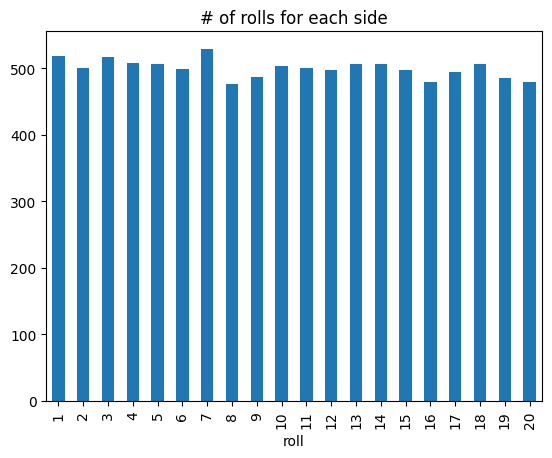

In [60]:
freq = df["roll"].value_counts().sort_index()
freq.plot.bar(title="# of rolls for each side")

## Create a Function to Visualize the Result

Make what you just did into a function called `visualizeDiceRolls()`.
- This function must accept one parameter, a DataFrame with the data column `roll`.
- This function must return a bar plot using `.plot.bar()`.
- The bar chart must be a frequency bar chart with the x-axis sorted by the **category name** (not by frequency).

In [61]:
def visualizeDiceRolls(df):
    freq = df['roll'].value_counts().sort_index()
    return freq.plot.bar()

<Axes: xlabel='roll'>

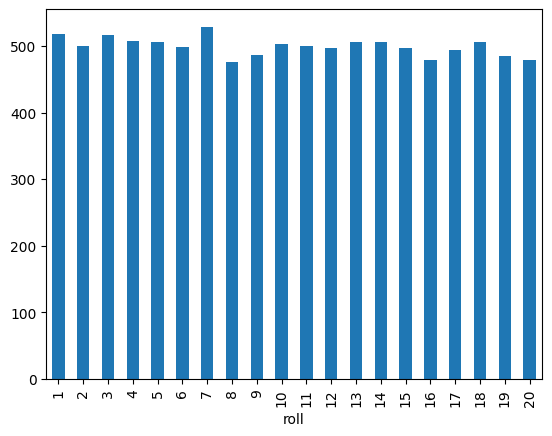

In [62]:
# Test to see if it works:
visualizeDiceRolls(df)

In [63]:
### TEST CASE for Puzzle 1.3: visualizeDiceRolls Function
tada = "\N{PARTY POPPER}"

assert("visualizeDiceRolls" in vars())

import matplotlib.pyplot as plt
plt.close()

v = visualizeDiceRolls(pd.DataFrame([
  {"roll": 2},
  {"roll": 1},
  {"roll": 2},
  {"roll": 1},
  {"roll": 2},
]))

assert(v.xaxis.get_ticklabels()[0].get_text() != "(1,)" ), \
  "It appears you built your graph from your entire DataFrame, instead of using just df[\"roll\"]."

assert(v.xaxis.get_ticklabels()[0].get_text() == "1" ), \
  "Your plot is incorrect.  It MUST show the x-axis label \"1\" as the first bar in the bar chart."

assert(v.xaxis.get_ticklabels()[1].get_text() == "2")

xticks = list(map(lambda d: d.get_text(), v.yaxis.get_ticklabels()))
assert("3.0" in xticks or "3" in xticks or "3." in xticks or 3 in xticks), \
  f"Your plot must contain tha label 3.0 (max count value). Your values: {xticks}"

plt.close()

v = visualizeDiceRolls(pd.DataFrame([
  {"roll": 5},
  {"roll": 3},
  {"roll": 2},
  {"roll": 1},
  {"roll": 4},
]))

assert( v.xaxis.get_ticklabels()[0].get_text() == "1" )
assert( v.xaxis.get_ticklabels()[1].get_text() == "2" )
assert( v.xaxis.get_ticklabels()[2].get_text() == "3" )
assert( v.xaxis.get_ticklabels()[3].get_text() == "4" )
assert( v.xaxis.get_ticklabels()[4].get_text() == "5" )

plt.close()

print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Puzzle 1.4: Rolling a d20

The d20 is used for many things, including determing if an attack hits or misses. The higher the number rolled, the more likely you are to hit. If you roll a 20, you get a *critical hit* and deal even more damage! Create another simulation where you roll **10,000** d20s (unless `num_sides` is already 20), and use pandas to calculate the following:
- The mean of the rolls
- The standard deviation of the rolls
- The probability of rolling a 20

In [68]:
# Use this cell to run the simulation


In [69]:
# Find the mean:
d20_mean = df.mean().item()
d20_mean

10.419

In [70]:
# Find the standard deviation of the roll:
d20_std = df.std().item()
d20_std

5.766278175426472

In [71]:
# Find the probability of rolling a 20:
d20_p_crit = len(df[df.roll == 20])/len(df)
d20_p_crit

0.048

Finally, use your `visualizeDiceRolls` function to visualize this set of rolls:

<Axes: xlabel='roll'>

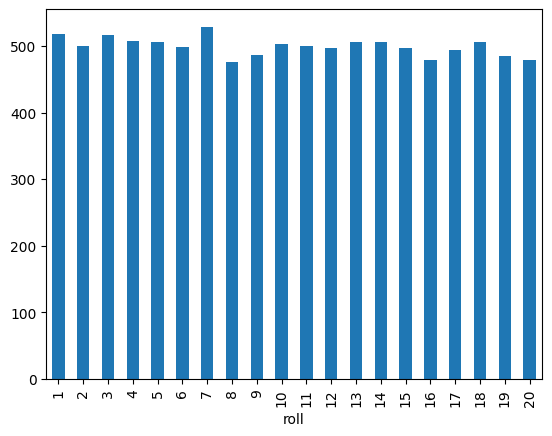

In [72]:
visualizeDiceRolls(df)

In [73]:
### TEST CASE for Puzzle 1.4: Rolling a d20

tada = "\N{PARTY POPPER}"

import math
assert("d20_mean" in vars())
assert("d20_std" in vars())
assert("d20_p_crit" in vars())
assert(math.isclose(d20_mean, 10.5, abs_tol = 0.2)), "d20_mean has the wrong value"
assert(math.isclose(d20_std, 33.25**0.5, abs_tol = 0.1)), "d20_std has the wrong value"
assert(math.isclose(d20_p_crit, 1/20, abs_tol = 0.075)), "d20_p_crit has the wrong value"
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Puzzle 2: Rolling With Advantage

### Puzzle 2.1: Advantage

Finding the value of a single die rolled once is simple enough. However, in DnD, you can *roll with advantage*, meaning that you roll two dice and use the higher value. For example, if you roll two d20s and get a 7 and a 15, your value is a 15. Simulate rolling **10,000** d20s with advantage, and store the results in `df_d20_adv` under the column `"roll"`.

In [ ]:
...

Like before, calculate:
- The mean of the rolls
- The standard deviation of the rolls
- The probability of rolling a 20

In [ ]:
d20_adv_mean = ...
d20_adv_mean

In [ ]:
d20_adv_std = ...
d20_adv_std

In [ ]:
d20_adv_p_crit = ...
d20_adv_p_crit

Notice the differences between these values and the ones for d20 without advantage. The probability of a critical hit is about twice as high!

Use your `visualizeDiceRolls` function to visualize this set or rolls (`df_d20_adv`):

In [ ]:
visualizeDiceRolls(df_d20_adv)

In [ ]:
### TEST CASE for Puzzle 2.1: Advantage

tada = "\N{PARTY POPPER}"

assert("df_d20_adv" in vars()), "Make sure to name the dataframe df_d20_adv"
assert(len(df_d20_adv) == 10000), "Make sure to roll 10,000 times"
assert(all(df_d20_adv.roll.isin(range(1, 21)))), "Found rolls that were not between 1 and 20, inclusive"
assert(all([i in df_d20_adv.roll.values for i in range(1, 21)])), "Not all values between 1 and 20, inclusive, were rolled"
assert(df_d20_adv.value_counts()[20]/df_d20_adv.value_counts()[1] > 20), "Make sure you are rolling with advantage (use the higher of the two rolls)"
assert("d20_adv_mean" in vars())
assert("d20_adv_std" in vars())
assert("d20_adv_p_crit" in vars())
assert(math.isclose(d20_adv_mean, 13.825, abs_tol = 0.2)), "d20_adv_mean has the wrong value"
assert(math.isclose(d20_adv_std, 22.194375**0.5, abs_tol = 0.2)), "d20_adv_std has the wrong value"
assert(math.isclose(d20_adv_p_crit, 39/400, abs_tol = 0.01)), "d20_adv_p_crit has the wrong value"
print(f"{tada} All Tests Passed! {tada}") 

### Puzzle 2.2: Disadvantage

Just as you can take the higher of two d20s, you can also take the lower of two d20s, which is called rolling with disadvantage. Let's try implementing it. Do you think it'll be similar to rolling with advantage?

Simulate rolling **10,000** d20s with disadvantage, and store the results in `df_d20_disadv` under the column `"roll"`.  Then calculate:
- The mean of the rolls
- The standard deviation of the rolls
- The probability of rolling a 20
- The probability of a **rolling a 1**

In [ ]:
# Run simulation here
...

In [ ]:
d20_disadv_mean = ...
d20_disadv_mean

In [ ]:
d20_disadv_std = ...
d20_disadv_std

In [ ]:
d20_disadv_p_crit = ...
d20_disadv_p_crit

In [ ]:
d20_disadv_p_1 = ...
d20_disadv_p_1

Use your `visualizeDiceRolls` function to visualize this set or rolls (`df_d20_disadv`):

In [ ]:
visualizeDiceRolls(df_d20_disadv)

In [ ]:
### TEST CASE for Puzzle 2.2: Disadvantage

tada = "\N{PARTY POPPER}"

assert("df_d20_disadv" in vars()), "Make sure to name the dataframe df_d20_disadv"
assert(len(df_d20_disadv) == 10000), "Make sure to roll 10,000 times"
assert(all(df_d20_disadv.roll.isin(range(1, 21)))), "Found rolls that were not between 1 and 20, inclusive"
assert(all([i in df_d20_disadv.roll.values for i in range(1, 21)])), "Not all values between 1 and 20, inclusive, were rolled"
assert(df_d20_disadv.value_counts()[1]/df_d20_disadv.value_counts()[20] > 20), "Make sure you are rolling with disadvantage (use the lower of the two rolls)"
assert("d20_disadv_mean" in vars())
assert("d20_disadv_std" in vars())
assert("d20_disadv_p_1" in vars())
assert(math.isclose(d20_disadv_mean, 7.175, abs_tol = 0.2)), "d20_disadv_mean has the wrong value"
assert(math.isclose(d20_disadv_std, 22.194375**0.5, abs_tol = 0.2)), "d20_disadv_std has the wrong value"
assert(math.isclose(d20_disadv_p_crit, 0.0025, abs_tol = 0.02)), "d20_disadv_p_crit has the wrong value"
assert(math.isclose(d20_disadv_p_1, 39/400, abs_tol = 0.02)), "d20_disadv_p_1 has the wrong value. Make sure to calculate the PROBABILITY OF ROLLING A 1"
print(f"{tada} All Tests Passed! {tada}") 

### Puzzle 2.3: Triple Advantage

In [special cases](http://dnd5e.wikidot.com/feat:elven-accuracy), when you roll with advantage, you can reroll one of the dice. This is effectively the same as rolling three dice and taking the highest, called "triple advantage"! Simulate rolling **100,000** d20s with triple advantage, and store the results in `df_d20_trip_adv` under the column `"roll"`.

In [ ]:
# Remember, **ROLL 100,000 TIMES**
...

Now calculate:
- The mean of the rolls
- The standard deviation of the rolls
- The probability of a 20

In [ ]:
d20_trip_adv_mean = ...
d20_trip_adv_mean

In [ ]:
d20_trip_adv_std = ...
d20_trip_adv_std

In [ ]:
d20_trip_adv_p_crit = ...
d20_trip_adv_p_crit

Use your `visualizeDiceRolls` function to visualize this set or rolls (`df_d20_trip_adv`):

In [ ]:
visualizeDiceRolls(df_d20_trip_adv)

In [ ]:
### TEST CASE for Puzzle 2.3: Triple Advantage

tada = "\N{PARTY POPPER}"

assert("df_d20_trip_adv" in vars()), "Make sure to name the dataframe df_d20_trip_adv"
assert(len(df_d20_trip_adv) == 100000), "Make sure to roll 100,000 times"
assert(all(df_d20_trip_adv.roll.isin(range(1, 21)))), "Found rolls that were not between 1 and 20, inclusive"
assert(all([i in df_d20_trip_adv.roll.values for i in range(1, 21)])), "Not all values between 1 and 20, inclusive, were rolled"
assert(df_d20_trip_adv.value_counts()[20]/df_d20_trip_adv.value_counts()[1] > 500), "Make sure you are rolling with triple advantage (use the highest of the three rolls)"
assert("d20_trip_adv_mean" in vars())
assert("d20_trip_adv_std" in vars())
assert("d20_trip_adv_p_crit" in vars())
assert(math.isclose(d20_trip_adv_mean, 15.4875, abs_tol = 0.05)), "d20_disadv_mean has the wrong value"
assert(math.isclose(d20_trip_adv_std, 14.95834375**0.5, abs_tol = 0.05)), "d20_trip_adv_std has the wrong value"
assert(math.isclose(d20_trip_adv_p_crit, 0.142625, abs_tol = 0.005)), "d20_trip_adv_p_crit has the wrong value"
print(f"{tada} All Tests Passed! {tada}") 

Finally, run the code cell below (don't change anything!) to compare the values for everything we've calculated so far. Notice any patterns?

What's the average of the means for with advantage and with disadvantage? Do you recognize this number?

In [ ]:
pd.DataFrame({
    "Roll Type": ["With disadvantage", "No advantage", "With advantage", "With triple advantage"],
    "Mean": [d20_disadv_mean, d20_mean, d20_adv_mean, d20_trip_adv_mean],
    "Standard Deviation": [d20_disadv_std, d20_std, d20_adv_std, d20_trip_adv_std],
    "Probability of 20": [d20_disadv_p_crit, d20_p_crit, d20_adv_p_crit, d20_trip_adv_p_crit]
})

In [ ]:
# Feel free to add extra code here!


This section was inspired by a video by Matt Parker (Stand-up Maths): https://www.youtube.com/watch?v=X_DdGRjtwAo

<hr style="color: #DD3403;">

## Puzzle 3: Damage Rolls

We've rolled *a lot* of d20s! Let's assume that your attack hit. Now we need to figure out how much damage you deal.

There are a ton of ways to deal damage in DnD, but for this microproject, you'll be playing a [paladin](https://roll20.net/compendium/dnd5e/Paladin) wielding a [greatsword](https://roll20.net/compendium/dnd5e/Greatsword) (2d6 damage). The 2d6 means that you roll two separate d6s and add them together.

You also have a [strength modifier](https://roll20.net/compendium/dnd5e/Ability%20Scores#toc_12) of **+3**, which you'll add to the damage after the rolls.

### Puzzle 3.1: Normal Damage Roll

Simulate a normal damage roll for your greatsword wielding paladin by rolling for damage **100,000** times.  Remember that:
- You will roll two separate d6s (don't just double the result!)
- After rolling, add 3 more damage.

Store the results in `df_damage` under the `"damage"` column.  Remember you can use your `rollDie` function!

In [ ]:
...

In [ ]:
# View a few random runs of the simulation:
df_damage.sample(n=5)

In [ ]:
### TEST CASE for Puzzle 3.1: Normal Damage Roll
tada = "\N{PARTY POPPER}"

assert("df_damage" in vars()), "Make sure to name the dataframe df_damage"
assert(len(df_damage) == 100000), "Make sure to roll 100,000 times"
assert(all(df_damage.damage.isin(range(5, 16)))), "Found rolls that were not between 5 and 15, inclusive. (Did you forget the +3, or two dice?)"
assert(all([i in df_damage.damage.values for i in range(5, 16)])), "Not all values between 5 and 15, inclusive, were rolled"

print(f"{tada} All Tests Passed! {tada}") 

### Puzzle 3.2: Damage Visualization

In Puzzle 1.3, you created a `visualizeDiceRolls` to visualize the result of dice rolls.  Create a very similar function below to create a visualize of the damage done, using the same technique as Puzzle 1.3.

The only key differences will be (1): the name of the function (`visualizeDamage`) and, (2): using the data in the DataFrame column `"damage"`.  Create the `visualizeDamage` function.

*You may want to refer back to Puzzle 1.3 to help out here.*

In [ ]:
def visualizeDamage(df):
  ...

Let's visualize the damage outcomes of your paladin:

In [ ]:
visualizeDamage(df_damage)

### Puzzle 3.3: Normal Damage Statistics

We'll now calculate two basic statistics:
- The mean damage
- The standard deviation of the damage

In [ ]:
damage_mean = ...
damage_mean

In [ ]:
damage_std = ...
damage_std

In [ ]:
### TEST CASE for Puzzle 3.3: Normal Damage Statistics

tada = "\N{PARTY POPPER}"
assert("damage_mean" in vars())
assert("damage_std" in vars())
assert(math.isclose(damage_mean, 10, abs_tol = 0.05)), "damage_mean has the wrong value"
assert(math.isclose(damage_std, (35/6)**0.5, abs_tol = 0.05)), "damage_std has the wrong value"
print(f"{tada} All Tests Passed! {tada}") 

### Puzzle 3.4: Divine Smite

In the previous part, you asw your paladin is dealing an average (and median) of 10 damage, but we can do better than that! :)

Paladins are able to add [divine smite](https://roll20.net/compendium/dnd5e/Paladin#toc_11), dealing an **EXTRA** **3d8** damage if a level 2 spell slot is used.  (That's an additional three d8s, in addition to the original two d6s!)

Simulate rolling for damage with divine smite **100,000** times, and store the results in `df_damage_smite` under the `"damage"` column. Remember to still add your strength modifier (**+3**) afterwards.

In [ ]:
...

Now, visualize this damage:

In [ ]:
visualizeDamage(df_damage_smite)

Finally, find a few basic statistics:

In [ ]:
damage_smite_mean = ...
damage_smite_mean

In [ ]:
damage_smite_std = ...
damage_smite_std

In [ ]:
### TEST CASE for Puzzle 3.4: Divine Smite
tada = "\N{PARTY POPPER}"

assert("df_damage_smite" in vars()), "Make sure to name the dataframe df_damage_smite"
assert(len(df_damage_smite) == 100000), "Make sure to roll 100,000 times"
assert(all(df_damage_smite.damage.isin(range(8, 40)))), "Found rolls that were not between 8 and 39, inclusive"
assert(all([i in df_damage_smite.damage.values for i in range(9, 39)])), "Not all values between 9 and 38, inclusive, were rolled"
assert("damage_smite_mean" in vars())
assert("damage_smite_std" in vars())
assert(math.isclose(damage_smite_mean, 23.5, abs_tol = 0.05)), "damage_smite_mean has the wrong value"
assert(math.isclose(damage_smite_std, (259/12)**0.5, abs_tol = 0.05)), "damage_smite_std has the wrong value"
print(f"{tada} All Tests Passed! {tada}") 

### Puzzle 3.5: Critical Hit with Divine Smite

Let's say you got a 20 on your attack roll -- it's a critical hit!

A critical hit means you will roll twice as many dice for damage!  Simulate rolling for damage **100,000** times with both divine smite and a critical hit. That is, roll 4d6, 6d8, and then add your strength modifier (**+3**).

That's a lot of dice!  Store the results in `df_damage_smite_crit` under the `"damage"` column.

In [ ]:
...

Now, visualize this damage:

In [ ]:
visualizeDamage(df_damage_smite_crit)

And find the mean and standard deviation:

In [ ]:
damage_smite_crit_mean = ...
damage_smite_crit_mean

In [ ]:
damage_smite_crit_std = ...
damage_smite_crit_std

In [ ]:
### TEST CASE for Puzzle 3.5: Critical Hit with Divine Smite 
tada = "\N{PARTY POPPER}"

assert("df_damage_smite_crit" in vars()), "Make sure to name the dataframe df_damage_smite_crit"
assert(len(df_damage_smite_crit) == 100000), "Make sure to roll 100,000 times"
assert(all(df_damage_smite_crit.damage.isin(range(13, 75)))), "Found rolls that were not between 13 and 75, inclusive"
assert(all([i in df_damage_smite_crit.damage.values for i in range(21, 68)])), "Not all values between 21 and 67, inclusive, were rolled"
assert("damage_smite_crit_mean" in vars())
assert("damage_smite_crit_std" in vars())
assert(math.isclose(damage_smite_crit_mean, 44, abs_tol = 0.05)), "damage_smite_crit_mean has the wrong value"
assert(math.isclose(damage_smite_crit_std, (259/6)**0.5, abs_tol = 0.05)), "damage_smite_crit_std has the wrong value"
print(f"{tada} All Tests Passed! {tada}") 

## Damage Summary

The cell below provides a summary of all the calculations from this section (no modifications needed, you can just run it):

In [ ]:
pd.DataFrame({
    "Damage Bonus": ["None", "Smite", "Smite and crit"],
    "Mean": [damage_mean, damage_smite_mean, damage_smite_crit_mean],
    "Standard Deviation": [damage_std, damage_smite_std, damage_smite_crit_std],
})

Notice any patterns?  If you subtract 3 (the strength modifier) from the means, what's the relationship between the mean with smite and the mean with smite and crit?

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/dungeons-and-dragons/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉
